# Airbnb Data Analyze

This is a project for analyzing airbnb data in Seattle.

## Questions: 
* What time of year has the highest rental prices?
* What factors have an influence on booking price ? 
* How well can we predict an host price?
* What aspects correlate well to host earnings?

In [1148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [992]:
listings_df = pd.read_csv("input/airbnb_seattle/listings.csv")
calendar_df = pd.read_csv("input/airbnb_seattle/calendar.csv")

## Explore and clean data

In [974]:
print(listings_df.columns)
display(listings_df.head())

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [975]:
print(calendar_df.columns)
display(calendar_df.head())

Index(['listing_id', 'date', 'available', 'price'], dtype='object')


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [976]:
#list percentage of missing data on each column of listings.csv data
listing_missing_df = listings_df.isna().mean()*100
listing_missing_df = listing_missing_df[listing_missing_df > 0]
print(type(listing_missing_df))
print(listing_missing_df.sort_values(ascending=False))

<class 'pandas.core.series.Series'>
license                        100.000000
square_feet                     97.459403
monthly_price                   60.267156
security_deposit                51.126244
weekly_price                    47.380828
notes                           42.063908
neighborhood_overview           27.029859
cleaning_fee                    26.977475
transit                         24.463070
host_about                      22.498690
host_acceptance_rate            20.246202
review_scores_accuracy          17.234154
review_scores_checkin           17.234154
review_scores_value             17.181771
review_scores_location          17.155579
review_scores_cleanliness       17.103195
review_scores_communication     17.050812
review_scores_rating            16.946045
reviews_per_month               16.422211
first_review                    16.422211
last_review                     16.422211
space                           14.903091
host_response_time              13.69827

In [1164]:
#drop columns have too much missing data and useless
listings_df.drop(columns=['license', 'square_feet', 'monthly_price', 'security_deposit',
                         'weekly_price', 'notes', 'neighborhood_overview', 'cleaning_fee',
                         'transit', 'host_about'], inplace=True)

In [1163]:
#list percentage of missing data on each column of calendar.csv data
calendar_missing_df = calendar_df.isna().mean()*100
calendar_missing_df = calendar_missing_df[calendar_missing_df > 0]
print(calendar_missing_df.sort_values(ascending=False))

price    32.938998
dtype: float64


In [1131]:
def create_dummy_df(df, cat_cols, dummy_na=False, drop_first=True):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        df = pd.concat(
            [
                df.drop(columns=col),
                pd.get_dummies(df[col], prefix=col, dummy_na=dummy_na, drop_first=drop_first)
            ],
            axis=1
        )
    return df


def create_series_str_dummy(df, cat_cols):
    for col in cat_cols:
        df = pd.concat(
            [
                df.drop(columns=col),
                df[col].str.get_dummies().rename(columns=lambda x: col + '_' + x)
            ],
            axis=1
        )
    return df


def convert_bool_data(df, cols):
    df.dropna(subset=cols, inplace=True)
    for col in cols:
        df.loc[:, col] = df[col].map(lambda x: True if x == 't' else False)
    return df


def convert_percent_data(df, cols):
    for col in cols:
        df.loc[:, col] = df[col].str.rstrip('%').astype(float) / 100.0
    return df

def convert_dollar_data(df, cols):
    for col in cols:
            df.loc[:, col] = df[col].replace("[\$,]", "", regex=True).astype(float)
    return df


def clean_data(listings_df, calendar_df):
    '''
    INPUT
    listings_df - pandas dataframe containing listings data 
    calendar_df - pandas dataframe containing calendar data
    
    OUTPUT
    df - cleaned dataset, which contains merged tables:
    1. irrelevant columns are dropped;
    2. string containing dates are converted into numbers;
    3. columns, containing lists, are split into several columns (for example, amenities)
    4. missing values are imputed with mean or mode.
    '''
    #merge dataframe
    listings_df = listings_df.rename(index=str, columns={"id": "listing_id"})
    df = pd.merge(calendar_df, listings_df, on = 'listing_id')
    
    #drop the irrelevant columns and columns with too much missing data
    columns_to_drop = ['available', 'host_id','host_location','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated', 'host_acceptance_rate',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']
    df = df.drop(columns = columns_to_drop)
    
    #negligle number of nan values, so drop these rows
    df.dropna(subset=["bathrooms", "bedrooms", "beds"], inplace=True)
    for col in ["bathrooms", "bedrooms", "beds"]:
        df[col] = df[col].round(0).astype(int)

    #convert date from the calendar into month and year
    df['date'] = pd.to_datetime(calendar_df['date'])
    
    #remove rows where price_x == np.nan, because price will be used as response
    df = df.dropna(subset=['price_x'])
    
    df.rename(columns={'price_x':'price'}, inplace=True)
    
    #convert price object to float
    dollar_cols = ['price', 'extra_people']
    df = convert_dollar_data(df, dollar_cols)
    
    
    df['host_since_year'] = pd.to_datetime(df['host_since']).dt.year
    # it seems like fill nan with mean is a good choise
    df['host_since_year'].fillna(df['host_since_year'].mean(), inplace=True)
    df['host_since_year'] = df['host_since_year'].astype(int)
    df.drop(columns='host_since', inplace=True)
    
    df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace=True)
    
    rate_cols = ['host_response_rate']
    df = convert_percent_data(df, rate_cols)
    
    df['host_response_rate'].fillna(df['host_response_rate'].mean(), inplace=True)
    
    df['host_response_time'].fillna(method='backfill', inplace=True)

    df['host_listings_count'] = df['host_listings_count'].round(0).fillna(0).astype(int)
    
    df['amenities'] = df['amenities'].map(lambda amns: '|'.join(
        [amn.replace("}", "").replace("{", "").replace('"', "") for amn in amns.split(',')]
    ))

    df.drop(df[df.host_verifications == 'None'].index, inplace=True)
    
    df['host_verifications'] = df['host_verifications'].map(
        lambda x_list: '|'.join([x for x in ast.literal_eval(x_list)])
    )
    
    for col in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
                "review_scores_checkin", "review_scores_communication", "review_scores_location",
                "review_scores_value"]:
        df[col].fillna(df[col].mean(), inplace = True)
    
    bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']
    df = convert_bool_data(df, bool_cols)
    
    return df

df = clean_data(listings_df, calendar_df)

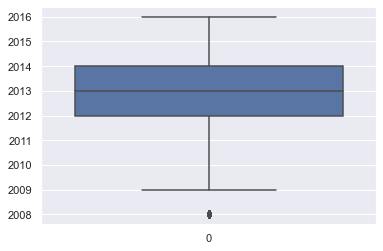

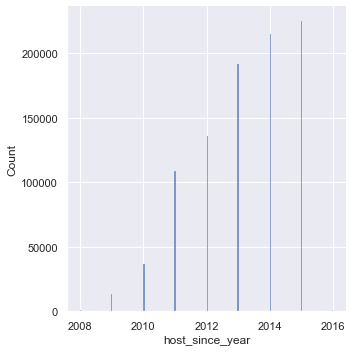

In [979]:
sns.boxplot(data=df['host_since_year'])
sns.displot(df['host_since_year'])

<AxesSubplot:>

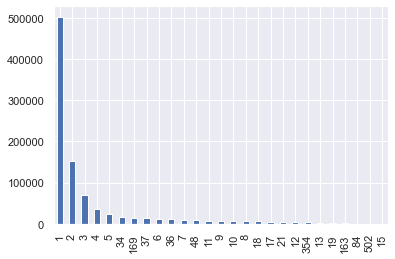

In [980]:
df['host_listings_count'].value_counts().plot.bar()

## What factors have an influence on booking price ?

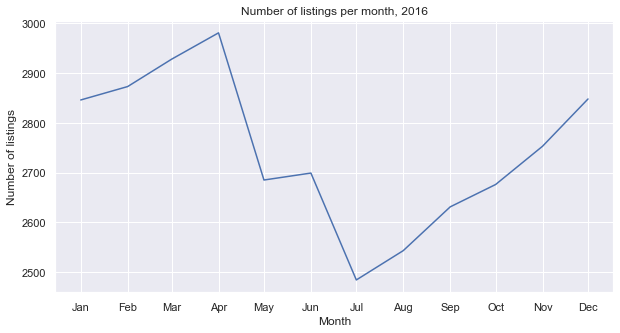

In [981]:
import matplotlib.dates as mdates

#find number of total number of listings for each month in 2016
number_of_listings_by_month = df[df['date'].dt.year == 2016].\
groupby(pd.Grouper(key='date', freq='MS'))['listing_id'].nunique().to_frame('id_count')

plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')
plt.show()

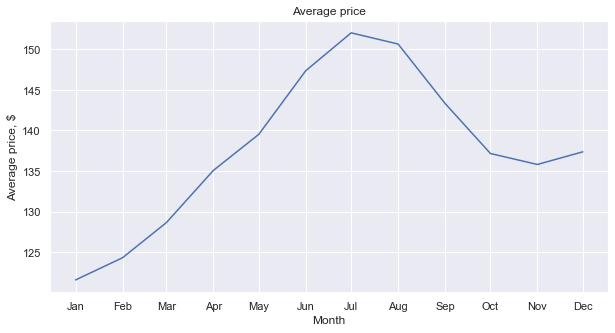

In [982]:
average_price_by_month = df[df['date'].dt.year == 2016].\
groupby(pd.Grouper(key='date', freq='MS'))['price'].mean().to_frame('average_price')

plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')
plt.show()

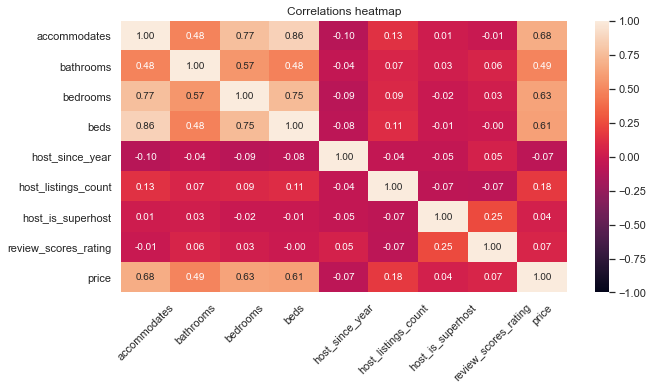

In [983]:
cols = ['accommodates', 'bathrooms', 'bedrooms','beds', 'host_since_year',
        'host_listings_count', 'host_is_superhost', 'review_scores_rating', 'price']

#Find out correlation between columns and plot
fig, ax = plt.subplots(figsize=(10,5))
heatmap = sns.heatmap(df[cols].corr(), vmin=-1, vmax=1, fmt = '.2f', 
                      annot=True, ax=ax)
heatmap.set_title('Correlations heatmap')
plt.xticks(rotation = 45)
plt.show()

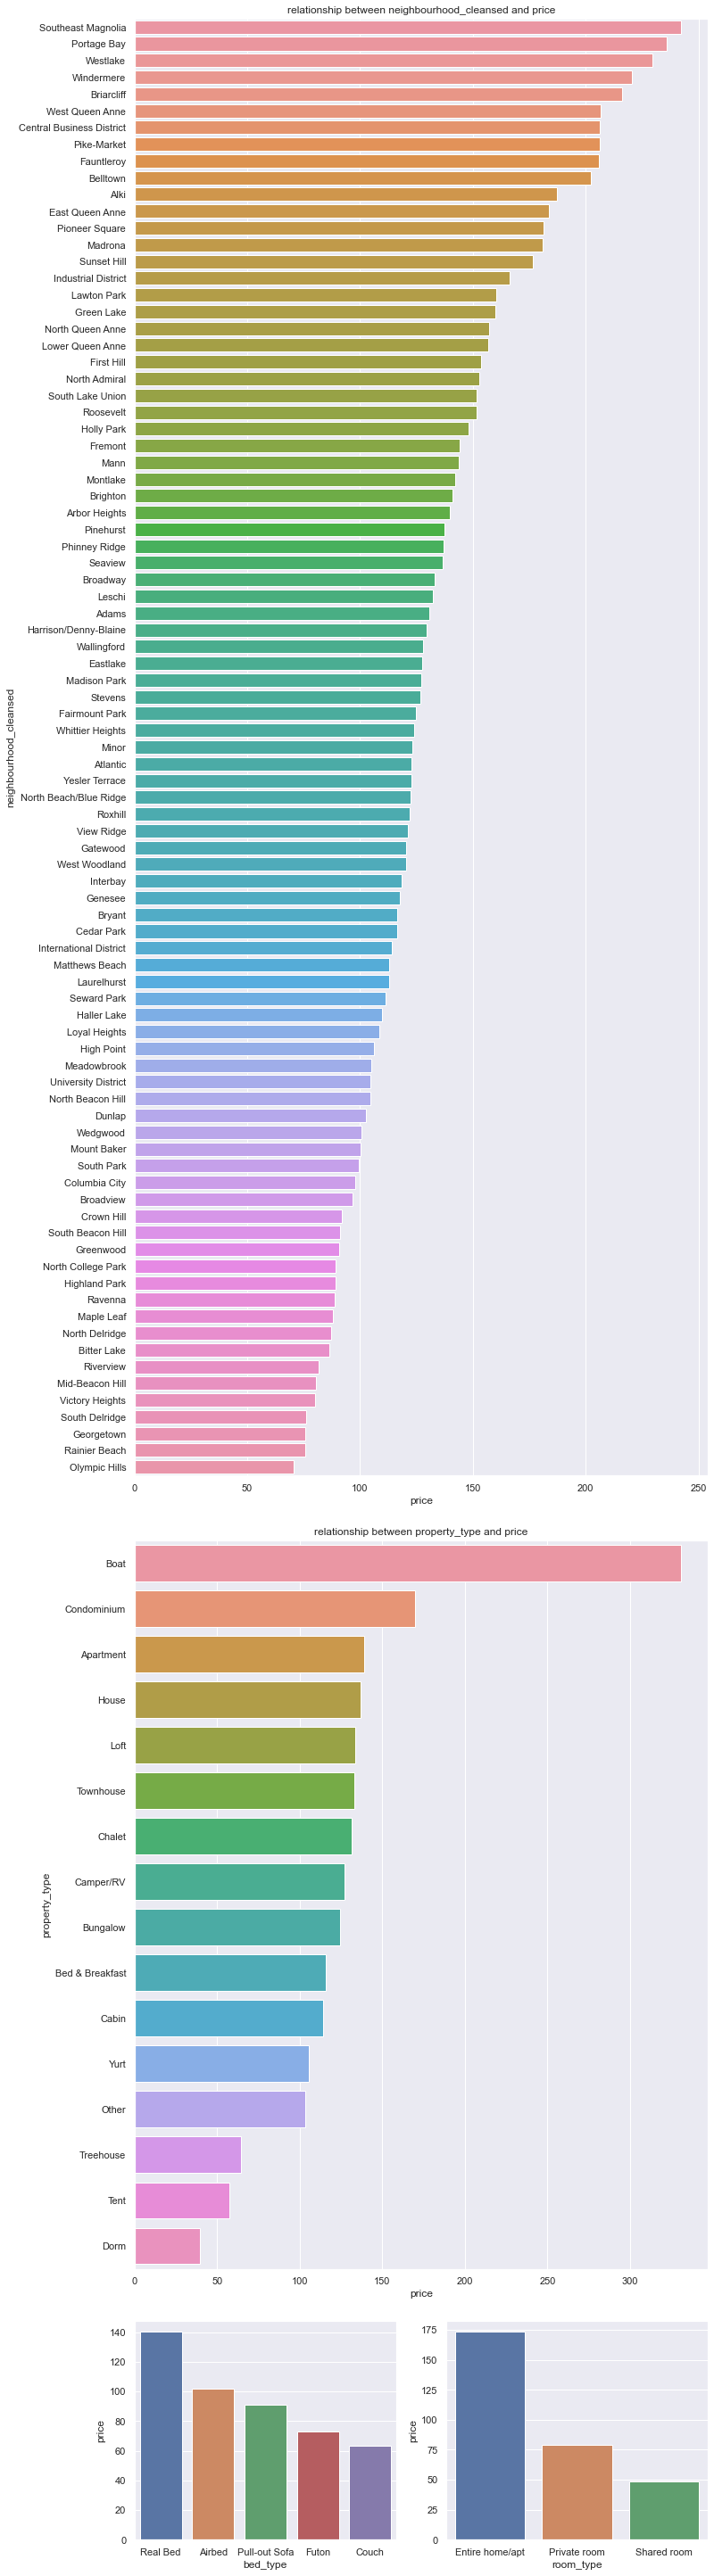

In [984]:
def plot_price_by_cat(df, x, y, colname, ax):
    price_col = df.groupby(colname)['price'].mean().to_frame()
    price_col.reset_index(inplace=True)
    sns.barplot(x=x, y=y, data=price_col.sort_values(by='price', ascending=False), ax=ax)


df = df[df['price'].notnull()]
# fig, ax = plt.subplots(3, 2, figsize=(11, 40), gridspec_kw={'height_ratios':[2,1,1]})
fig = plt.figure(constrained_layout=True, figsize=(11, 40))
gs = fig.add_gridspec(3, 2, height_ratios=[2, 1, 0.3])

colname = 'neighbourhood_cleansed'
f_ax1 = fig.add_subplot(gs[0, :])
f_ax1.set_title("relationship between neighbourhood_cleansed and price")
plot_price_by_cat(df, x='price', y=colname, colname=colname, ax=f_ax1)

colname = 'property_type'
f_ax2 = fig.add_subplot(gs[1, :])
f_ax2.set_title("relationship between property_type and price")
plot_price_by_cat(df, x='price', y=colname, colname=colname, ax=f_ax2)

colname = 'bed_type'
f_ax3 = fig.add_subplot(gs[2, 0])
plot_price_by_cat(df, x=colname, y='price', colname=colname, ax=f_ax3)

colname = 'room_type'
f_ax4 = fig.add_subplot(gs[2, 1])
plot_price_by_cat(df, x=colname, y='price', colname=colname, ax=f_ax4)

plt.show()

count    927644.000000
mean        137.971272
std         105.286135
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64


<AxesSubplot:>

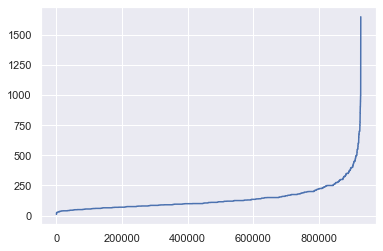

In [985]:
print(df['price'].describe())
df['price'].sort_values().reset_index(drop=True).plot()

price has some extremely high-value, that's hard to rent, unrealistic price
exploring price show prices <= 250 is reasonable

In [986]:
df_rentalhouse = df.query("price <= 250").copy()

## Predict price

In [987]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [988]:
cols = ['amenities', 'host_verifications']:
df_rentalhouse = create_series_str_dummy(df_rentalhouse, cols)
#create new categorical columns
category_columns = ['property_type', 'room_type', 'bed_type', 'host_response_time', 'neighbourhood_cleansed',
                    'cancellation_policy', 'neighbourhood_group_cleansed']
df_rentalhouse = create_dummy_df(df_rentalhouse, category_columns)
df_rentalhouse['date'] = df_rentalhouse['date'].map(dt.datetime.toordinal)
y = df_rentalhouse['price']
X = df_rentalhouse.drop(columns='price')
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lm_model = LinearRegression(normalize=True)

In [989]:
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)

In [990]:
print("The r-squared score of test data is {}".format(r2_score(y_test, y_test_preds)))
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test, y_test_preds))))

The r-squared score of test data is 0.6469329710426936
RMSE is 31.282265960342013


## What aspects correlate well to host earnings?

In [1250]:
from fancyimpute import IterativeImputer 


def draw_histograms(df, cols, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 30))
    for i, col in enumerate(cols):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        df[col].hist(bins=10, ax=ax)
        ax.set_title(col + " hist")
    fig.tight_layout()
    plt.show()


df_new = listings_df.copy()

#clean data
cols = ['host_acceptance_rate', 'host_response_rate']
df_new = convert_percent_data(df_new, cols)
cols = ['host_is_superhost', 'instant_bookable', 'host_identity_verified', 'host_has_profile_pic']
df_new = convert_bool_data(df_new, cols)
cols = ['price', 'extra_people']
df_new = convert_dollar_data(df_new, cols)
cols = ['amenities', 'host_verifications']
for col in cols:
    df_new.loc[:, col] = df[col]
df_new = create_series_str_dummy(df_new, cols)
cols = ['property_type', 'room_type', 'bed_type', 'host_response_time', 'neighbourhood_cleansed',
        'cancellation_policy', 'neighbourhood_group_cleansed']
df_new = create_dummy_df(df_new, cols)

cols = ['review_scores_rating', 'number_of_reviews', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'review_scores_rating',
        'reviews_per_month', 'bathrooms', 'bedrooms', 'beds', 
        'host_response_rate', 'host_acceptance_rate']
mice_imputer = IterativeImputer()
df_new.loc[:, cols] = mice_imputer.fit_transform(df_new[cols])


df_new['total_score'] = (df_new['review_scores_rating'] * 0.01 * df_new['number_of_reviews']) \
                        / (df_new['review_scores_accuracy'] + df_new['review_scores_cleanliness'] \
                          + df_new['review_scores_checkin'] + df_new['review_scores_communication'] \
                          + df_new['review_scores_location'] + df_new['review_scores_value'])

top_boundary = df_new['total_score'].quantile(0.9)
low_boundary = df_new['total_score'].quantile(0.25)

In [1253]:
df_new['total_score'].describe()

count    3816.000000
mean        0.362739
std         0.615546
min         0.000000
25%         0.030000
50%         0.144310
75%         0.428622
max         7.763793
Name: total_score, dtype: float64

In [1264]:
df_corr = df_new.copy()
df_corr = df_corr.drop(columns=['review_scores_rating', 'number_of_reviews', 'review_scores_accuracy',
                                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                                'review_scores_location', 'review_scores_value', 'review_scores_rating',
                                'reviews_per_month', 'host_id', 'id', 'scrape_id'
                               ])

In [1265]:
corr_matrix = df_corr.corr().unstack().sort_values(ascending=False)
corr_matrix['total_score'][1:]

host_is_superhost                                   0.264547
host_response_time_within an hour                   0.157339
property_type_Cabin                                 0.138804
cancellation_policy_moderate                        0.130040
instant_bookable                                    0.122609
host_response_rate                                  0.110616
neighbourhood_cleansed_International District       0.109404
availability_90                                     0.104941
availability_60                                     0.098767
host_identity_verified                              0.097529
availability_365                                    0.093649
room_type_Private room                              0.076619
availability_30                                     0.074321
property_type_Loft                                  0.063782
neighbourhood_cleansed_Whittier Heights             0.061550
neighbourhood_cleansed_Harrison/Denny-Blaine        0.052014
extra_people            

In [1354]:
df_top90 = df_new[df_new['total_score'] > top_boundary]
df_low25 = df_new[df_new['total_score'] < low_boundary]

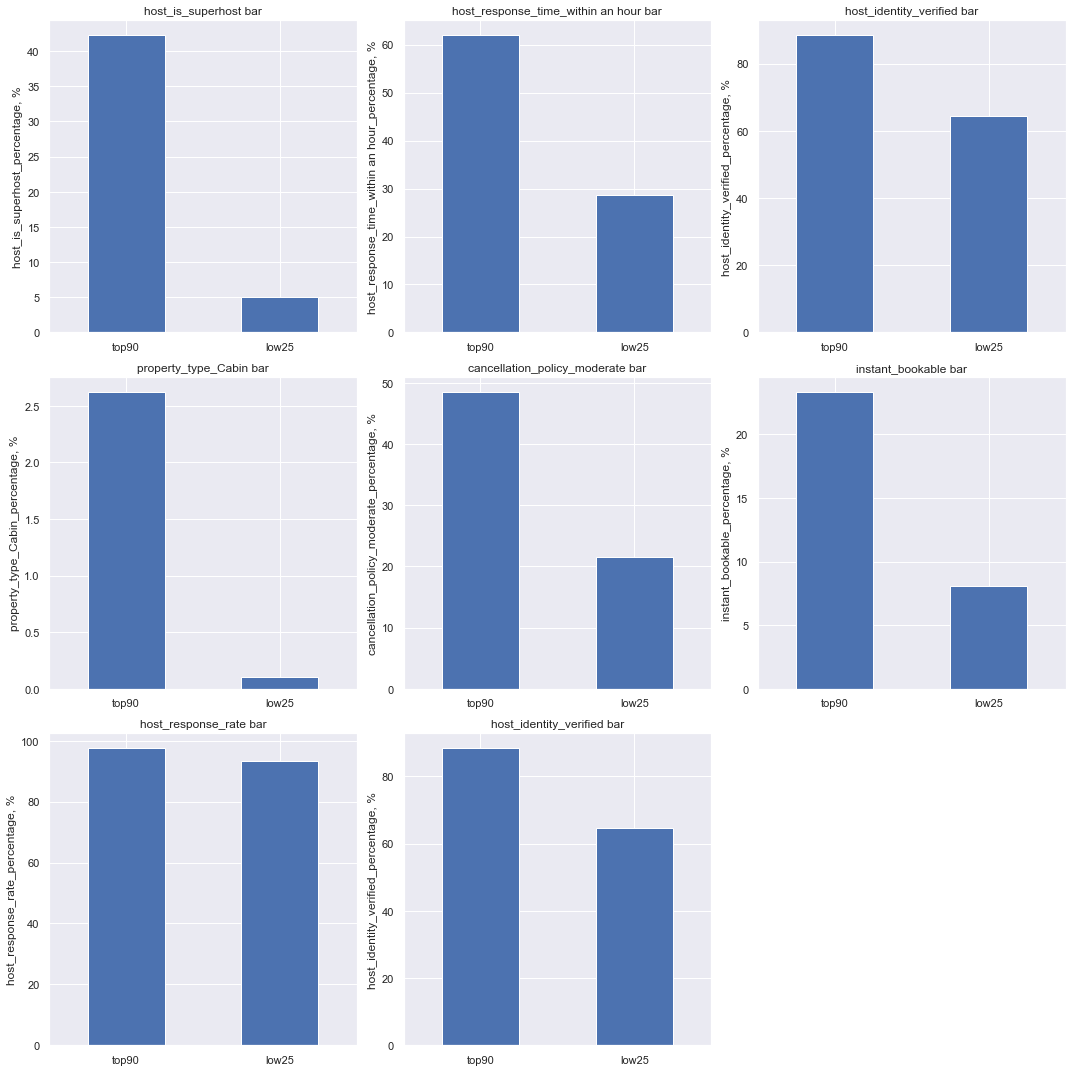

In [1380]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=3, ncols=3)
cols_to_plot = ['host_is_superhost', 'host_response_time_within an hour', 'host_identity_verified',
                'property_type_Cabin', 'cancellation_policy_moderate', 'instant_bookable',
                'host_response_rate', 'host_identity_verified']
for col, ax in zip(cols_to_plot, axes.flatten()):
    df_percentage = pd.DataFrame(
        index=['top90', 'low25'], 
        data=[
            df_top90[col].mean()*100, 
            df_low25[col].mean()*100
        ],
    )
    df_percentage.plot.bar(ylabel=col + '_percentage, %', rot=0, legend=False, ax=ax)
    ax.set_title(col + ' bar')
fig.delaxes(axes[2][2])
fig.tight_layout()
plt.show()